<a href="https://colab.research.google.com/github/ajaykumar080286/DeepLearning/blob/master/Xavier_Glorat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [3]:
df=pd.read_csv('1.ushape.csv')
df.columns = ["X", "Y", "class"]
df = df.round(2)
df.head()

,X,Y,class
0,2.12,-0.05,1.0
1,0.88,-0.08,0.0
2,-0.06,-0.04,1.0
3,0.83,-0.54,1.0
4,2.11,0.66,1.0


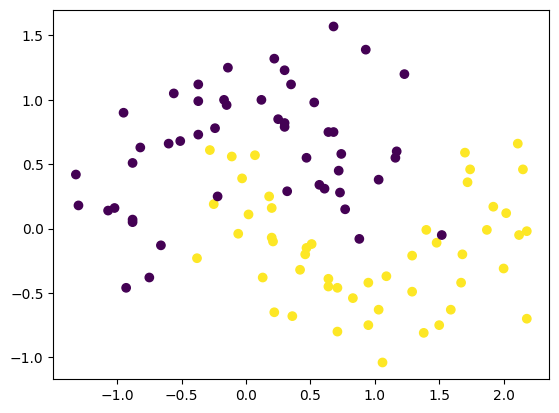

In [4]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [5]:
X=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [6]:
model=Sequential()

model.add(Dense(10, activation='tanh', input_dim=2))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.get_weights()[9].shape

(1,)

In [12]:
initial_weights = model.get_weights()

In [23]:
initial_weights[0]=np.random.randn(initial_weights[0].shape[0],initial_weights[0].shape[1])*np.sqrt(1/2)
initial_weights[1]=np.zeros(initial_weights[1].shape)
initial_weights[2]=np.random.randn(initial_weights[2].shape[0],initial_weights[2].shape[1])*np.sqrt(1/10)
initial_weights[3]=np.zeros(initial_weights[3].shape)
initial_weights[4]=np.random.randn(initial_weights[4].shape[0],initial_weights[4].shape[1])*np.sqrt(1/10)
initial_weights[5]=np.zeros(initial_weights[5].shape)
initial_weights[6]=np.random.randn(initial_weights[6].shape[0],initial_weights[6].shape[1])*np.sqrt(1/10)
initial_weights[7]=np.zeros(initial_weights[7].shape)
initial_weights[8]=np.random.randn(initial_weights[8].shape[0],initial_weights[8].shape[1])*np.sqrt(1/10)
initial_weights[9]=np.zeros(initial_weights[9].shape)

In [24]:
initial_weights

[array([[ 0.56416682, -0.59152108,  0.7825989 , -1.14193908,  0.84869527,
          0.20728042,  0.28025803, -0.88466008,  0.775117  , -0.36649072],
        [ 0.43103485, -0.14236647, -0.44609588,  0.25602555,  1.60812026,
         -0.22152994,  0.83875513,  0.13467615,  1.04701419,  0.31476277]]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([[ 0.21328613, -0.37650495, -0.21083869,  0.34109773,  0.38699184,
          0.19957538, -0.02747932,  0.19528325, -0.18484646, -0.11073188],
        [-0.31679247, -0.19510521,  0.02987835,  0.50333062, -0.76121059,
          0.47641729,  0.44548396,  0.44047156,  0.23032762,  0.09623591],
        [-0.26723674, -0.21825276, -0.23023786,  0.22618744,  0.09098126,
          0.61944129, -0.18118262, -0.36528258,  0.36508564, -0.38933537],
        [ 0.31510251, -0.01131955, -0.07737056, -0.60590148,  0.49838873,
          0.16777382, -0.12632756,  0.1109058 ,  0.2900579 ,  0.06470535],
        [-0.31114252, -0.44273524, -0.06374197, -0.033

In [25]:
model.set_weights(initial_weights)

In [26]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 231ms/step - accuracy: 0.6265 - loss: 0.6625 - val_accuracy: 0.6000 - val_loss: 0.6655
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.7114 - loss: 0.6524 - val_accuracy: 0.8500 - val_loss: 0.6529
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7894 - loss: 0.6474 - val_accuracy: 0.9000 - val_loss: 0.6399
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8537 - loss: 0.6397 - val_accuracy: 0.8500 - val_loss: 0.6277
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8176 - loss: 0.6328 - val_accuracy: 0.8000 - val_loss: 0.6151
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7972 - loss: 0.6246 - val_accuracy: 0.8000 - val_loss: 0.6026
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7659 - loss: 0.6228 - val_accuracy: 0.8000 - val_loss: 0.5909
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8230 - loss: 0.6047 - val_accuracy: 0.8000 - val_loss

In [28]:
model.get_weights()

[array([[ 0.47411308, -0.5697397 ,  0.65675783, -0.9704346 ,  0.8459086 ,
          0.27508146,  0.14160505, -0.8654946 ,  0.75583386, -0.4009122 ],
        [ 0.2830549 , -0.15419011, -0.59027535,  0.28210437,  1.6030334 ,
         -0.3343598 ,  0.91241896,  0.21055962,  1.0844492 ,  0.44895357]],
       dtype=float32),
 array([-0.15465903,  0.21918245, -0.10638227, -0.22990511, -0.21906497,
         0.00319536, -0.05078134,  0.13599835, -0.21096411,  0.11734489],
       dtype=float32),
 array([[ 0.11038274, -0.3754189 , -0.18278795,  0.19566885,  0.44016737,
          0.19326685, -0.03003911,  0.09650403, -0.12899072, -0.09656581],
        [-0.20809393, -0.18879509,  0.03738474,  0.616137  , -0.8384411 ,
          0.44733274,  0.40907732,  0.55275947,  0.15985565,  0.13264918],
        [-0.40188676, -0.2130696 , -0.30901384,  0.23993467,  0.22348712,
          0.70204484, -0.09319715, -0.5038364 ,  0.45134547, -0.51448584],
        [ 0.412658  , -0.04366323, -0.04959201, -0.5993323 , 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


<Axes: >

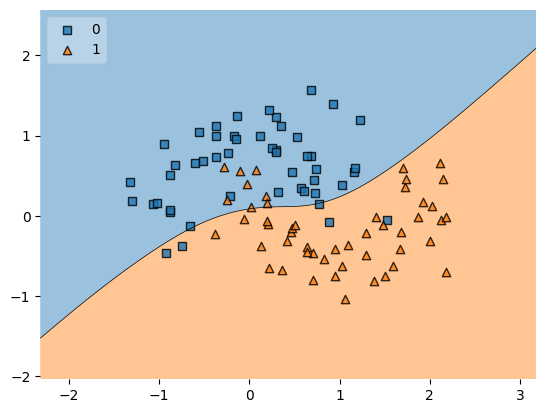

In [29]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X.values,y.values.astype('int'), clf=model, legend=2)

**Keras WeightInitial Xavie/Glorat**

In [36]:
model=Sequential()

model.add(Dense(10, activation='relu', input_dim=2, kernel_initializer="he_normal"))
model.add(Dense(10, activation='relu',kernel_initializer="he_normal"))
model.add(Dense(10, activation='relu',kernel_initializer="he_normal"))
model.add(Dense(10, activation='relu',kernel_initializer="he_normal"))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
 model.get_weights()

[array([[-0.7526426 ,  2.0713172 ,  0.6697979 , -1.2303582 , -1.7416117 ,
         -0.079326  , -1.5551304 , -0.7554091 , -0.10926682, -0.20703994],
        [-0.589766  ,  0.64074326,  0.6873813 , -0.6587838 , -1.2414097 ,
         -1.6396215 ,  0.9617517 ,  0.33840632,  0.6082463 ,  1.09818   ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.63608134,  0.7047459 ,  0.21215554, -0.1849486 ,  0.19838063,
          0.723048  , -0.15306118,  0.2930149 , -0.27580565, -0.39647853],
        [-0.3068773 ,  0.27799514, -0.22265296,  0.64162797,  0.20410286,
          0.71682215,  0.42134133, -0.06548759,  0.4818904 ,  0.22824809],
        [-0.44149363,  0.11194865, -0.0078106 ,  0.36237657,  0.4113131 ,
         -0.40997022, -0.30211627, -0.08098576,  0.1819373 ,  0.01774109],
        [-0.19197269, -0.47936386,  1.0030488 , -0.49641696, -0.92276084,
         -0.5472237 , -0.3858394 , -0.59684765, -0.563975  ,  0.48490843],
        [-0.54772

In [39]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 189ms/step - accuracy: 0.3515 - loss: 0.7916 - val_accuracy: 0.2000 - val_loss: 0.8814
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.3467 - loss: 0.7656 - val_accuracy: 0.2000 - val_loss: 0.8603
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.3720 - loss: 0.7629 - val_accuracy: 0.3000 - val_loss: 0.8418
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.4207 - loss: 0.7412 - val_accuracy: 0.4500 - val_loss: 0.8239
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5227 - loss: 0.7353 - val_accuracy: 0.4500 - val_loss: 0.8056
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.5266 - loss: 0.7121 - val_accuracy: 0.4500 - val_loss: 0.7887
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.4929 - loss: 0.7082 - val_accuracy: 0.4500 - val_loss: 0.7718
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.4998 - loss: 0.6919 - val_accuracy: 0.4500 - val_loss

In [41]:
model.get_weights()

[array([[-0.6287123 ,  2.1911213 ,  0.5620239 , -1.3768008 , -1.7868073 ,
          0.08363742, -1.562558  , -0.658877  , -0.13622314, -0.28516078],
        [-0.59978807,  0.45661768,  0.919974  , -0.5819343 , -1.3461552 ,
         -1.8765922 ,  0.95512617,  0.24744338,  0.7974869 ,  0.9512193 ]],
       dtype=float32),
 array([-0.15207875, -0.12078437,  0.0816065 , -0.02378807, -0.01101261,
         0.22112262, -0.0269594 , -0.02664017,  0.13090004, -0.16001509],
       dtype=float32),
 array([[-0.38809976,  0.7047459 ,  0.1486536 , -0.2106805 ,  0.17609686,
          0.723048  , -0.27509168,  0.2930149 , -0.2032351 , -0.24560812],
        [-0.01457309,  0.26467153, -0.11990545,  0.59218866,  0.2513728 ,
          0.78768253,  0.5177254 , -0.06548759,  0.48835802,  0.15775588],
        [-0.17647338,  0.13727391,  0.00141888,  0.49585497,  0.37684274,
         -0.53518516, -0.4355506 , -0.08098576,  0.2972631 , -0.06388168],
        [ 0.09163203, -0.47936386,  0.9515894 , -0.45905256, 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


<Axes: >

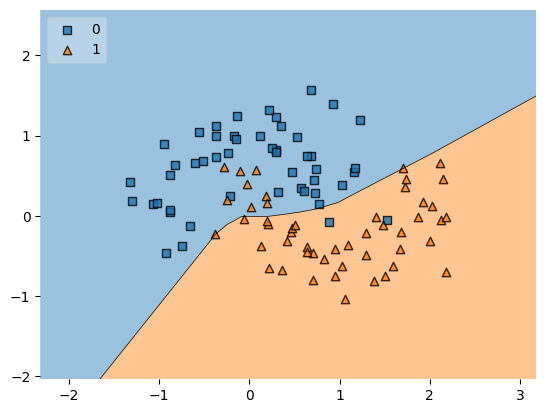

In [42]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X.values,y.values.astype('int'), clf=model, legend=2)